### Generating Data

This notebook follows the lecture 6 Generating Data in Pandas 

Ex in the lecture: generate synthetic data of the number of new visitors to an Emergency Department over time. 

How to create the date range and how to create the random data based on the poisson distribution.

Author: Jennifer Ibanez Cano

In [214]:
import pandas as pd
import numpy as np

In [215]:
# Use of date_range() function to create a range of dates with a specific frequency. 

pd.date_range(start='1/1/2018', end='1/07/2018')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [216]:
# For better practise is recommended to use the formatt 'YYYY-MM-DD', having the year first. 

pd.date_range(start='2023-01-01', end='2023-01-04')


DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'], dtype='datetime64[ns]', freq='D')

In [217]:
# Use of freq parameter to specify the frequency of the date range, for example the hourly data.

pd.date_range(start='2023-01-01', end='2023-01-04', freq="H")

/var/folders/04/rjtnj1kd1_xd5wl0szndnmt80000gn/T/ipykernel_5988/3786637036.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2023-01-01', end='2023-01-04', freq="H")


DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               '2023-01-01 10:00:00', '2023-01-01 11:00:00',
               '2023-01-01 12:00:00', '2023-01-01 13:00:00',
               '2023-01-01 14:00:00', '2023-01-01 15:00:00',
               '2023-01-01 16:00:00', '2023-01-01 17:00:00',
               '2023-01-01 18:00:00', '2023-01-01 19:00:00',
               '2023-01-01 20:00:00', '2023-01-01 21:00:00',
               '2023-01-01 22:00:00', '2023-01-01 23:00:00',
               '2023-01-02 00:00:00', '2023-01-02 01:00:00',
               '2023-01-02 02:00:00', '2023-01-02 03:00:00',
               '2023-01-02 04:00:00', '2023-01-02 05:00:00',
               '2023-01-02 06:00:00', '2023-01-02 07:00:00',
               '2023-01-

In [218]:
# Store this range of dates in a variable that can be added to a DataFrame as the index

idx = pd.date_range(start='2023-01-01', end='2023-01-04', freq="H")

/var/folders/04/rjtnj1kd1_xd5wl0szndnmt80000gn/T/ipykernel_5988/2288261990.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range(start='2023-01-01', end='2023-01-04', freq="H")


In [219]:
# generate some ramdom data (the same lenght of the idx)

rng = np.random.default_rng()

df = pd.DataFrame(index = idx, data = rng.random(len(idx)), columns=["admissions"])
df.head(3)

,admissions
2023-01-01 00:00:00,0.729792
2023-01-01 01:00:00,0.339054
2023-01-01 02:00:00,0.525264


As this dataset is very small, we are going to use the poisson distribution.

In [220]:
mean_admissions = 15

# use poisson distribution poisson(lam=the_mean, size= number_to_return)

df = pd.DataFrame(index = idx, data = rng.poisson(lam=mean_admissions, size= len(idx)), columns=["admissions"])
df.head(3)

,admissions
2023-01-01 00:00:00,16
2023-01-01 01:00:00,21
2023-01-01 02:00:00,18


In [221]:
# Import seaborn to plot the data

import seaborn as sns

<Axes: xlabel='None', ylabel='admissions'>

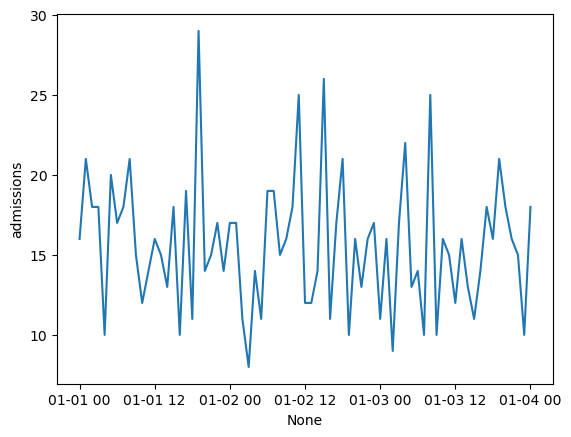

In [222]:
sns.lineplot(data=df,x = df.index, y="admissions")

In [223]:
df["admissions"].mean()

15.643835616438356

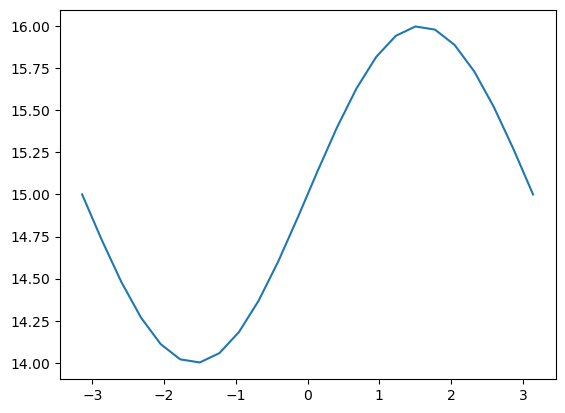

In [224]:
# As this is not taking into account the time of the day,
# we can pass in an array into lam to reflect the changing averages though out the day.

x = np.linspace(-np.pi, np.pi, 24)
means = np.sin(x) +15
import matplotlib.pylab as plt
plt.plot(x, means)

In [225]:
# df = pd.DataFrame(index = idx, data = rng.poisson(lam=means, size= len(idx)), columns=["admissions"])
# df.head(3)

# It'll give an error because the shape of the data is not the same as the index.

In [226]:
len(idx)

73

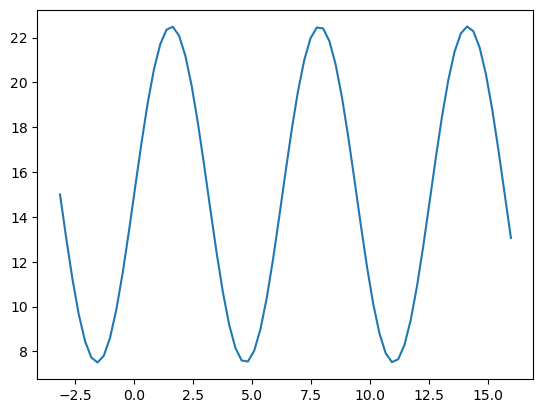

In [227]:
# x = np.linspace(-np.pi, 3*np.pi, len(73))
number_ofdays = len(idx)/24
multiplier =( number_ofdays *2) -1
x = x = np.linspace(-np.pi, multiplier*np.pi , len(idx))
admissions_means = (np.sin(x) * (mean_admissions/2)) + mean_admissions
import matplotlib.pylab as plt
plt.plot(x, admissions_means)

In [228]:
df = pd.DataFrame(index = idx, data = rng.poisson(lam=admissions_means, size= len(idx)), columns=["admissions"])
df.head(3)

,admissions
2023-01-01 00:00:00,12
2023-01-01 01:00:00,13
2023-01-01 02:00:00,12


<Axes: xlabel='None', ylabel='admissions'>

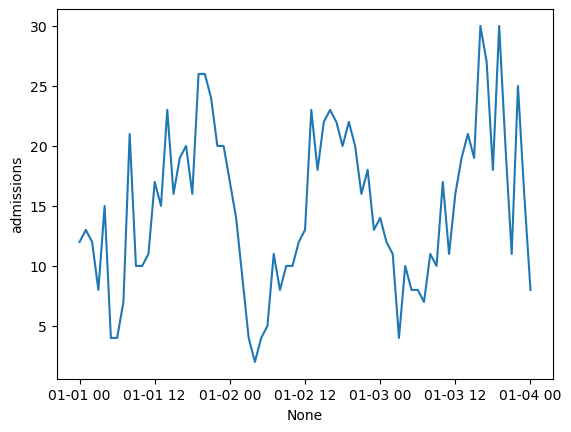

In [229]:
sns.lineplot(data=df,x = df.index, y="admissions")

#### References used in this lecture:

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
- https://en.wikipedia.org/wiki/Poisson_distribution
- https://www.w3schools.com/python/numpy/numpy_random_poisson.asp
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html
